# Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

# Step 1: The Setup (Loading and Pre-processing)



## Load dataset

In [164]:
path = 'heart.csv'
df = pd.read_csv(path)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Inspect the first and last few rows

In [124]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [125]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


## Get a summary of the data

In [126]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Check for and handle any missing values

In [128]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [129]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [130]:
df = df.dropna()
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


## Visualizing data

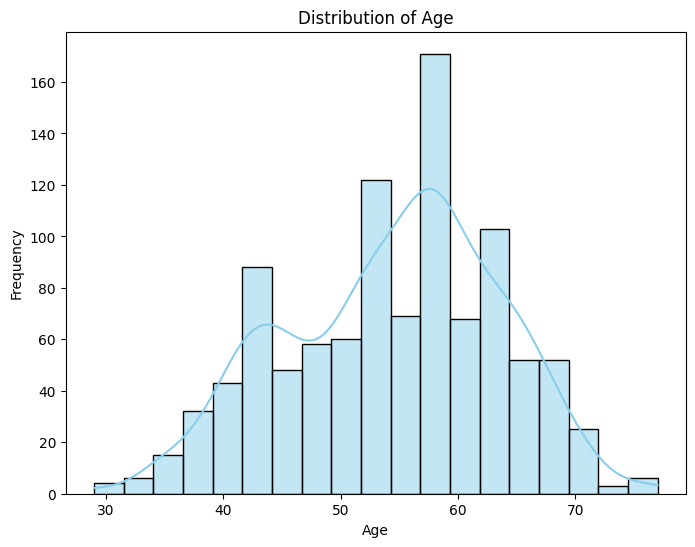

In [131]:
# Visualize the distribution of 'age'
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

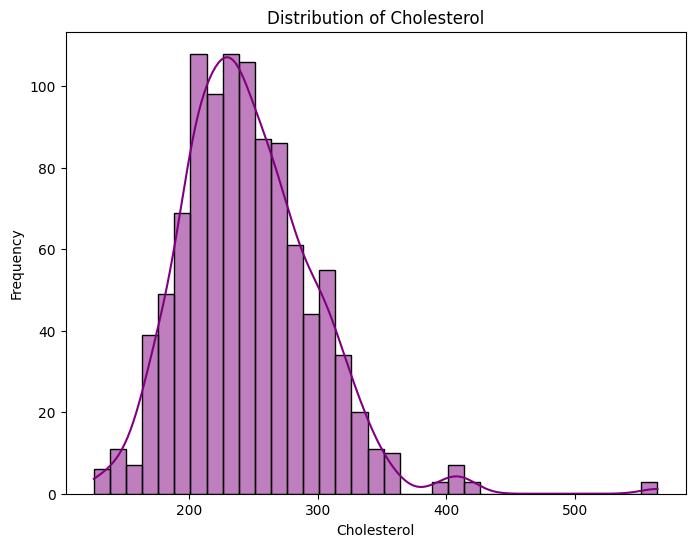

In [132]:
# Visualize the distribution of 'chol' (cholesterol)
plt.figure(figsize=(8, 6))
sns.histplot(df['chol'], kde=True, color='purple')
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

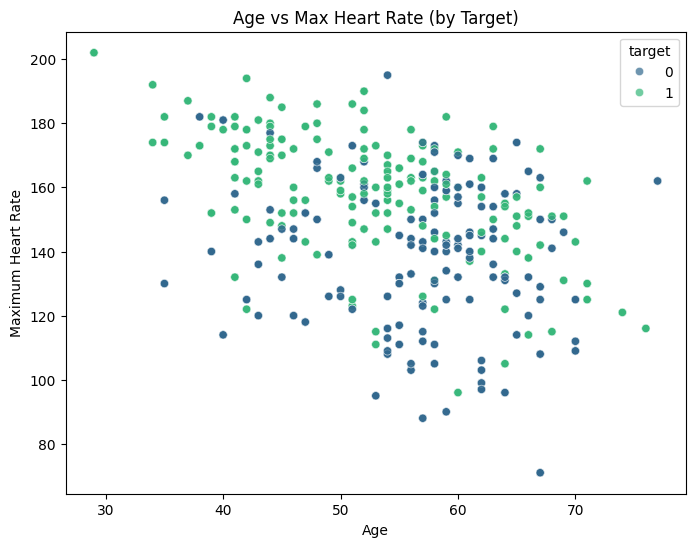

In [133]:
# Visualize the relationship between 'age' and 'thalach' (maximum heart rate achieved)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data = df, palette='viridis', alpha=0.7)
plt.title('Age vs Max Heart Rate (by Target)')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

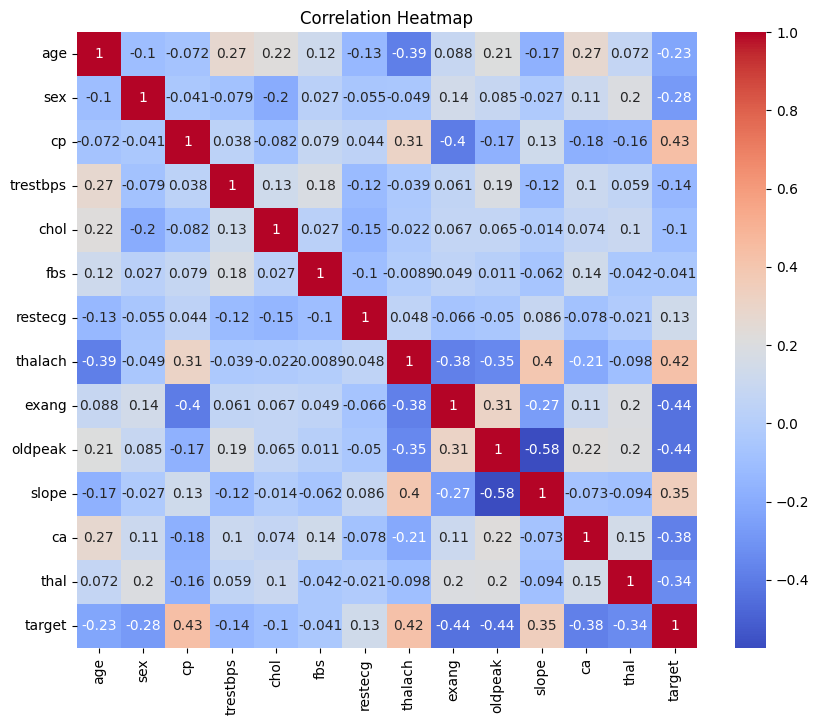

In [134]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Separate your features from the target variable

In [135]:
# For linear regression model
features_LinearRegression = df[['age']]
target_LinearRegression = df['thalach']

In [136]:
# For logistic regression model
features_LogisticRegression = df[['age', 'sex', 'cp', 'trestbps', 'chol']]
target_LogisticRegression = df['target']

In [137]:
# For logistic regression model with all columns(except target) is feature
features = df.drop(['target'], axis=1)
target = df['target']
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


# Step 2: The Predictor (Linear Regression)

## Select Features and Target

In [138]:
# X = df[['age']]
# y = df['thalach']

## Split the Data

In [139]:
X_train_LinearRegression, X_test_LinearRegression, y_train_LinearRegression, y_test_LinearRegression = train_test_split(features_LinearRegression, target_LinearRegression, test_size=0.2, random_state=1)

## Train the Model and make predictions

In [140]:
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(X_train_LinearRegression, y_train_LinearRegression)

LinearRegression()

In [141]:
y_pred_LinearRegression = model_LinearRegression.predict(X_test_LinearRegression)
y_pred_LinearRegression

array([143.71873549, 152.37917849, 161.03962149, 138.90737826,
       162.96416438, 148.53009271, 162.00189293, 146.60554982,
       145.64327838, 145.64327838, 162.96416438, 161.03962149,
       159.1150786 , 134.09602104, 157.19053571, 139.86964971,
       140.83192115, 162.00189293, 160.07735004, 145.64327838,
       153.34144993, 143.71873549, 137.94510682, 145.64327838,
       162.96416438, 145.64327838, 140.83192115, 147.56782126,
       150.4546356 , 155.26599282, 167.7755216 , 137.94510682,
       145.64327838, 146.60554982, 153.34144993, 141.7941926 ,
       148.53009271, 146.60554982, 139.86964971, 151.41690704,
       141.7941926 , 136.98283537, 157.19053571, 153.34144993,
       143.71873549, 162.00189293, 143.71873549, 144.68100693,
       151.41690704, 133.1337496 , 151.41690704, 159.1150786 ,
       164.88870727, 149.49236415, 147.56782126, 137.94510682,
       138.90737826, 151.41690704, 145.64327838, 143.71873549,
       153.34144993, 149.49236415, 157.19053571, 137.94

## Visualize the Result

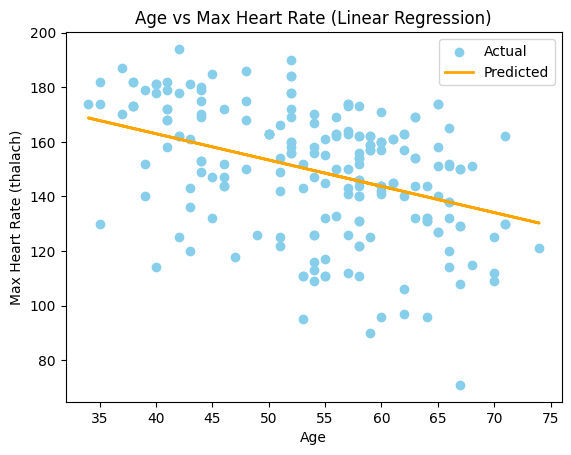

In [142]:
# Scatter plot of actual test data
plt.scatter(X_test_LinearRegression, y_test_LinearRegression, color='skyblue', label='Actual')

# Regression line (predicted values)
plt.plot(X_test_LinearRegression, y_pred_LinearRegression, color='orange', linewidth=2, label='Predicted')

plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalach)')
plt.title('Age vs Max Heart Rate (Linear Regression)')
plt.legend()
plt.show()

# Step 3: The Classifier (Logistic Regression)


## Select Features and Target

In [143]:
# X = df[['age', 'sex', 'cp', 'trestbps', 'chol']]
# y = df['target']

## Split the Data

In [144]:
X_train_LogisticRegression, X_test_LogisticRegression, y_train_LogisticRegression, y_test_LogisticRegression = train_test_split(features_LogisticRegression, target_LogisticRegression, test_size=0.2, random_state=100)

## Train the Model and make predictions

In [145]:
model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(X_train_LogisticRegression, y_train_LogisticRegression)

LogisticRegression()

In [146]:
y_pred_LogisticRegression = model_LogisticRegression.predict(X_test_LogisticRegression)
y_pred_LogisticRegression

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0])

In [147]:
y_pred_proba_LogisticRegression = model_LogisticRegression.predict_proba(X_test_LogisticRegression)[:, 1] ## To predict probability
y_pred_proba_LogisticRegression

array([0.93947076, 0.79718868, 0.16355851, 0.48383636, 0.71037952,
       0.28258309, 0.18506141, 0.79718868, 0.34638337, 0.83990186,
       0.19532663, 0.30371809, 0.93720888, 0.93794632, 0.46280086,
       0.71037952, 0.96374964, 0.96391921, 0.80619327, 0.20634793,
       0.58074557, 0.4267213 , 0.6320831 , 0.73550834, 0.23712894,
       0.89825218, 0.84216323, 0.45146996, 0.80471951, 0.1990172 ,
       0.86455091, 0.83321206, 0.96869128, 0.29407964, 0.45965439,
       0.35139469, 0.57951784, 0.45349375, 0.84202229, 0.28018142,
       0.28018142, 0.18734683, 0.67116711, 0.35963448, 0.98403327,
       0.76948819, 0.15353903, 0.63736751, 0.73016061, 0.27851276,
       0.82537904, 0.44908571, 0.80336354, 0.6255059 , 0.75471527,
       0.34335926, 0.73016061, 0.11278263, 0.28133777, 0.35234082,
       0.11278263, 0.8751771 , 0.31578352, 0.34090018, 0.0686727 ,
       0.46280086, 0.68568209, 0.92967814, 0.97137593, 0.15120595,
       0.93936406, 0.46390771, 0.12364298, 0.957411  , 0.21389

## Visualize the Result

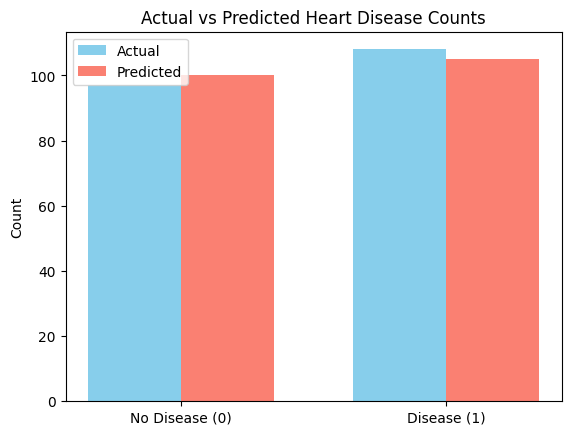

In [148]:
labels = ['No Disease (0)', 'Disease (1)']
actual_counts = [sum(y_test_LogisticRegression==0), sum(y_test_LogisticRegression==1)]
pred_counts = [sum(y_pred_LogisticRegression==0), sum(y_pred_LogisticRegression==1)]

x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, actual_counts, width, label='Actual', color='skyblue')
plt.bar(x + width/2, pred_counts, width, label='Predicted', color='salmon')
plt.ylabel('Count')
plt.title('Actual vs Predicted Heart Disease Counts')
plt.xticks(x, labels)
plt.legend()
plt.show()

# Step 4: The Judge (Model Evaluation)

## Calculate F1-Score

F1 score tells how well the model is performing
Higher f1 score means model is more accurate and is better in correctly identifying patients with heart disease(in this dataset) without making too many mistakes

In [150]:
f1 = f1_score(y_test_LogisticRegression, y_pred_LogisticRegression)
print(f'F1 Score: {f1}')

F1 Score: 0.8075117370892019


F1 Score of 0.8075117370892019 means model is 80.75117370892019% accurate in in correctly identifying patients with heart disease

## Calculate ROC-AUC Score

ROC curve shows how well a model separates two classes across different thresholds
AUC score tells how strong the separation is
Higher AUC means the model is better at distinguishing between patients with and without heart disease
If AUC is close to 1, model is performing well

In [151]:
auc = roc_auc_score(y_test_LogisticRegression, y_pred_proba_LogisticRegression)
auc

np.float64(0.882397861779305)

AUC Score of 0.882397861779305 means model is 88.2397861779305% accurate in correctly distinguishing between patients with and without heart disease

## Plot the ROC Curve

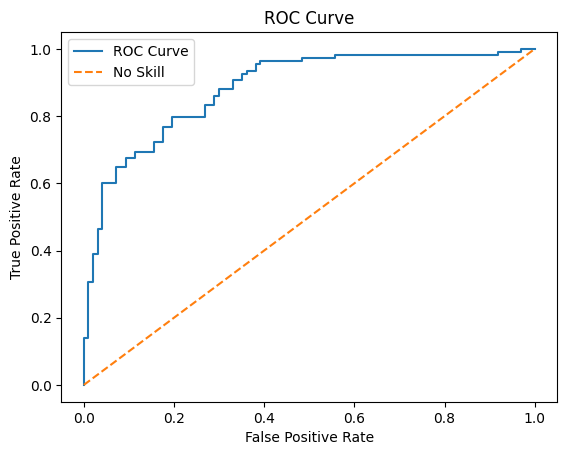

In [152]:
fpr, tpr, thresholds = roc_curve(y_test_LogisticRegression, y_pred_proba_LogisticRegression)

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Full-Featured Model

## Split the Data

In [153]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)

## Feature Scaling

In [154]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train the Model and make predictions

In [155]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

## Calculate F1 and ROC-AUC Score

In [156]:
f1_2 = f1_score(y_test, y_pred)
auc_2 = roc_auc_score(y_test, y_pred_proba)

print("New Model F1 Score:", f1_2)
print("New Model ROC-AUC:", auc_2)

New Model F1 Score: 0.8782608695652174
New Model ROC-AUC: 0.9347079037800686


F1 Score of 0.8782608695652174 means model is 87.82608695652174% accurate in in correctly identifying patients with heart disease

AUC Score of 0.9347079037800686 means model is 93.47079037800686% accurate in correctly distinguishing between patients with and without heart disease

## Plot the ROC Curve

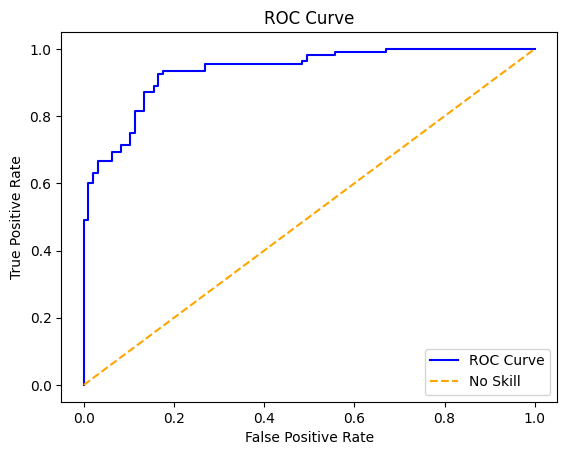

In [161]:
fpr_full, tpr_full, thresholds_full = roc_curve(y_test, y_pred_proba)

plt.plot(fpr_full, tpr_full, label='ROC Curve', color = 'blue')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill', color='orange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Compare Performance

## Comparing through ROC curve

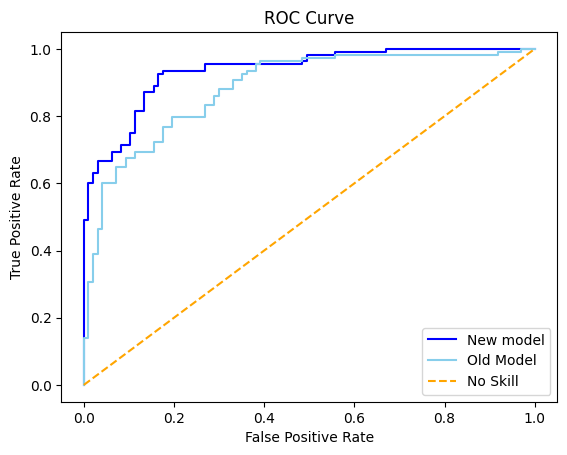

In [163]:
plt.plot(fpr_full, tpr_full, label='New model', color = 'blue')
plt.plot(fpr, tpr, label='Old Model', color='skyblue')
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill', color='orange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Comparing through difference in f1 and auc score

In [158]:
f1_2 - f1

0.07074913247601555

In [159]:
auc_2 - auc

np.float64(0.05231004200076361)